# Master EDA Notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Let's take a look at the data and look for incorrect data types

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

'date' is an object rather than datetime. Let's fix that before checking the other objects

In [3]:
df['date'] = pd.to_datetime(df['date'])


Now, we can loop over the other objects to check what we can do with them, and check for NaN values.

In [4]:
frame = pd.DataFrame(df.dtypes)
categoricals = list(frame.loc[frame.iloc[:,0]=='object'].iloc[:,0].keys())
for col in categoricals:
    print(col,"\n",df[col].value_counts().sort_values(ascending=False),"\n")

waterfront 
 NO     19075
YES      146
Name: waterfront, dtype: int64 

view 
 NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64 

condition 
 Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64 

grade 
 7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64 

sqft_basement 
 0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2120.0        1
295.0         1
207.0         1
915.0         1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64 



In [5]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

'waterfront' needs to be converted to a binary value and we'll also do mode imputing to fill the NaNs.

In [6]:
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].isnull().any()
df['waterfront'] = df['waterfront'].replace(['NO','YES'],[0, 1])

'view' 'grade' and 'condition' can be converted to ordinal integers.

In [7]:
df.view.replace(['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],list(range(0,5)), inplace = True)
df.view.fillna(0, inplace = True)
df['view'] = df.view.astype('int')

In [8]:
ser = []
for x in df.grade:
    ser.append(x.split(' ')[0])
df['grade'] = ser
df['grade'] = df['grade'].astype('int') - 3

In [9]:
condition_list = ['Poor','Fair','Average','Good','Very Good']
df.condition.replace(condition_list,list(range(0,5)),inplace=True)

'sqft_basement' should be an integer, but there are '?' strings interfering. Let's calculate those missing values by testing if there is square footage unaccounted for in the home (non-living space) and converting everything to integers.

In [10]:
for z,i  in enumerate(df['sqft_basement']):
    if i == '?':
        #print(z)
        df.sqft_basement.iat[z] = df.loc[z,'sqft_living'] - df.loc[z, 'sqft_above']
df['perc_basement'] = df.sqft_basement.astype('float') / df['sqft_living']
df.drop(columns=['sqft_basement','sqft_above'],inplace=True)

In [11]:
min_date = df.date.min()
df['diff_date'] = df.date - min_date
df['diff_date'] = df.diff_date.astype('timedelta64[D]').astype('int')

Now let's look at our numerical data for outliers.

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,perc_basement,diff_date
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,2.409825,4.657915,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.124594,180.180997
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.170999,113.059987
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,2.000000,4.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000,81.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,2.000000,4.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,167.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,3.000000,5.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.274390,291.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,10.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.666667,390.000000


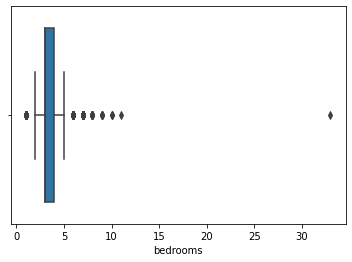

In [13]:
sns.boxplot(data = df, x = 'bedrooms');

'bedrooms' has an outlier of 33. Upon closer inspection, it appears to be a typo. We will change it to 3.

In [14]:
df.iat[15856,3] = 3

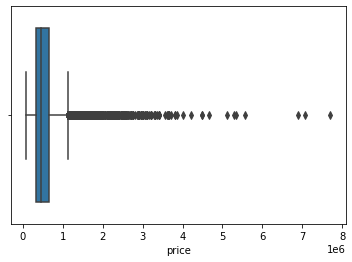

In [15]:
sns.boxplot(data = df, x = 'price');

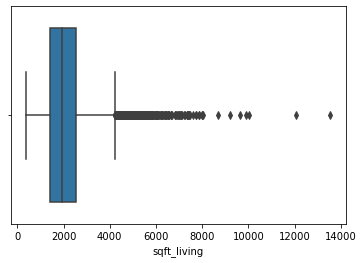

In [16]:
sns.boxplot(data = df, x = 'sqft_living');

There are also statistical outliers above $5 million and above3e 13000 sqft. I don't think our model needs to generalize to these types of homes, so we will drop them.

In [17]:
df = df.loc[df['price'] < 5000000]
df= df.loc[df['sqft_living'] < 13000]


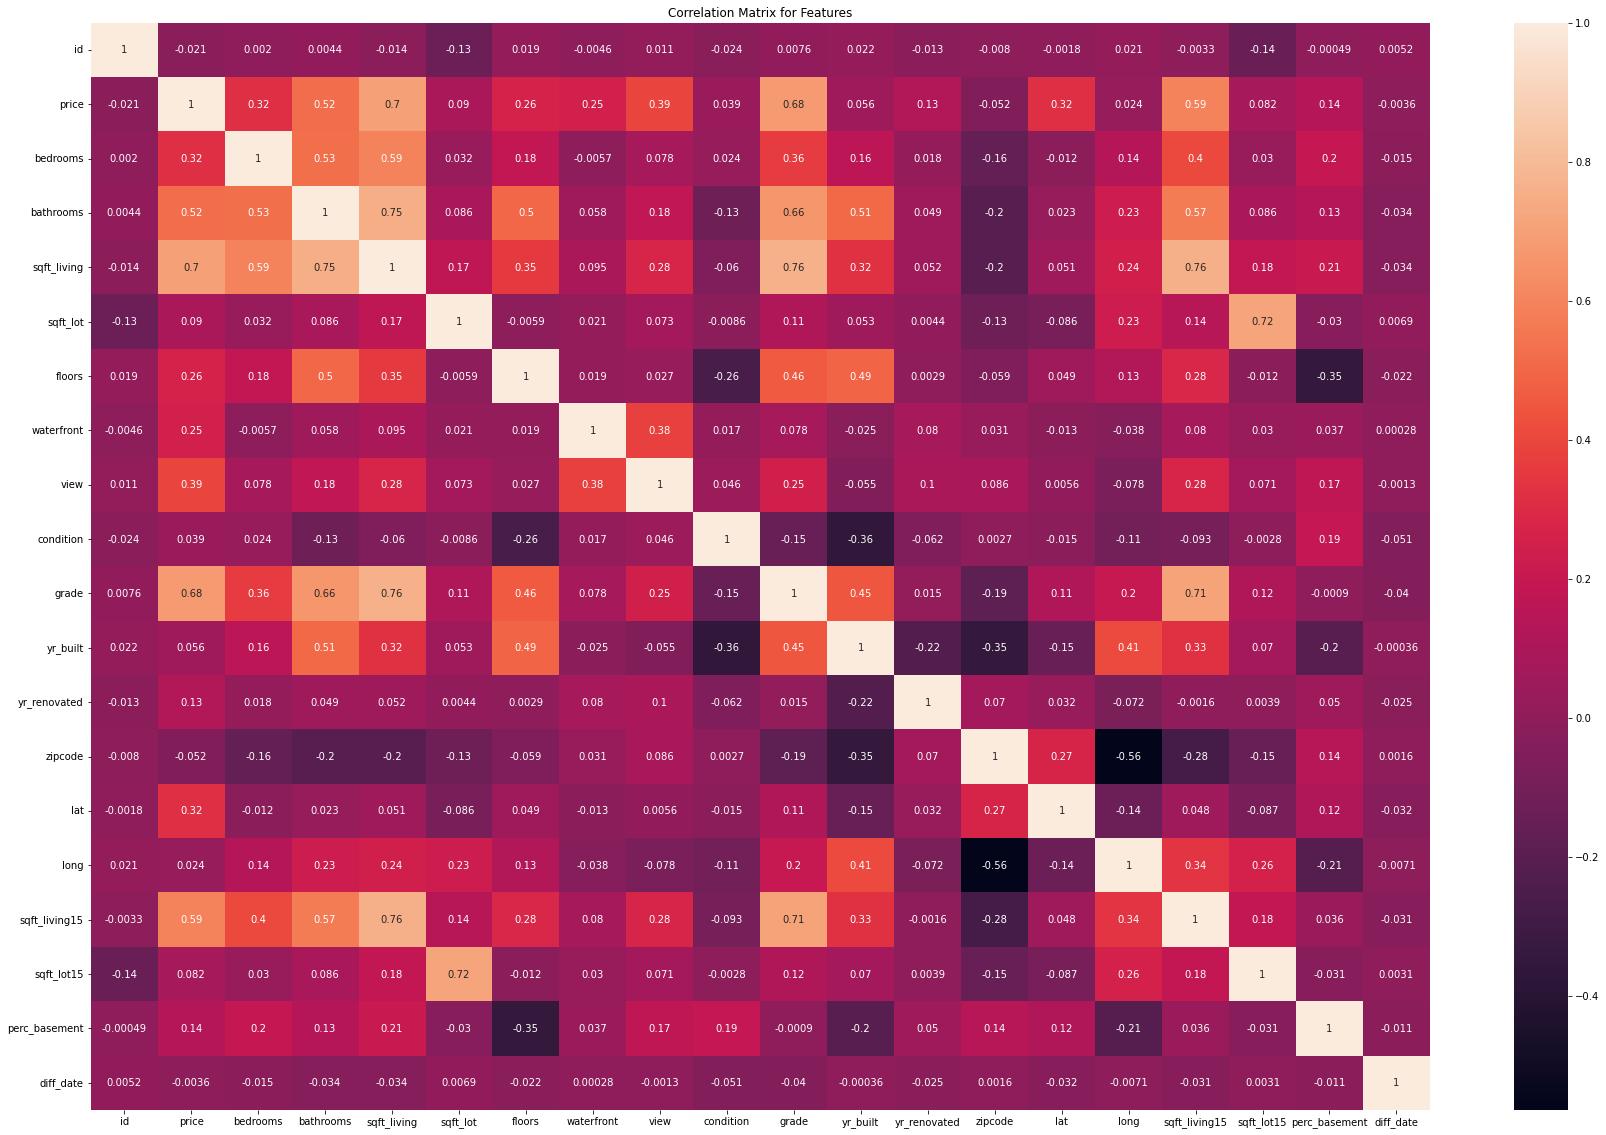

In [18]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.show()

Here we have some pretty obvious covariance, namely 'sqft_living15' and 'sqft_lot15.' We can amelioriate this by dividing them by 'sqft_living' and 'sqft_lot,' respectively to yield percentages. They represent the size of the average house/lot compared to the home.

In [19]:
df['sqft_living15'] = df.sqft_living15/df.sqft_living

In [20]:
df['sqft_lot15'] = df.sqft_lot15/df.sqft_lot

'floors' has "half-floors" which may complicate things. Since half-floors are not stacked, we will take them out of the numerical value and create a boolean variable instead.

In [21]:
df['storeys'] = df['floors'].astype('int')

In [22]:
df = pd.get_dummies(df, columns=['floors'])
df['half_floor'] = df['floors_1.5'] + df['floors_2.5'] + df['floors_3.5']

In [23]:
df['has_stairs_inside'] = df['floors_1.0'].replace({0:1,1:0})

In [24]:

df.drop(columns=['floors_1.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5'], inplace=True)

In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'perc_basement', 'diff_date', 'storeys', 'half_floor',
       'has_stairs_inside'],
      dtype='object')

In [26]:
df.yr_built[3]

1965

In [27]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['last_work_done'] = df.yr_built
for i,v in enumerate(df.yr_renovated):
    app = None
    if v != 0:
        df['last_work_done'][i] = v
    ser.append(app)

C:\Users\kapta\AppData\Local\Temp\ipykernel_9132\2106715413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_work_done'][i] = v


In [28]:
from geopy.distance import geodesic as GD

In [29]:
lat_seattle_downtown = 47.6050
long_seattle_downtown = -122.334
df['lat_long_tup'] = tuple(zip(df.lat,df.long))
df['dist_to_seattle'] = df.lat_long_tup.map(lambda x: GD(x,(lat_seattle_downtown,long_seattle_downtown)).km)
df.drop(columns = ['lat_long_tup'],inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,perc_basement,diff_date,storeys,half_floor,has_stairs_inside,last_work_done,dist_to_seattle
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,0,0,2,...,-122.257,1.135593,1.000000,0.000000,164,1,0,0,1955,11.930775
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,0,0,2,...,-122.319,0.657588,1.054819,0.155642,221,2,0,1,1991,12.946433
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,0,0,2,...,-122.233,3.532468,0.806200,0.000000,299,1,0,0,1933,16.609359
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,...,-122.393,0.693878,1.000000,0.464286,221,1,0,0,1965,10.361036
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,0,0,2,...,-122.045,1.071429,0.928589,0.000000,292,1,0,0,1987,21.767956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,0,0,2,...,-122.346,1.000000,1.334218,0.000000,19,3,0,1,2009,10.523295
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,0,0,2,...,-122.362,0.792208,1.238603,0.000000,297,2,0,1,2014,10.694116
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,0,0,2,...,-122.299,1.000000,1.486667,0.000000,52,2,0,1,2009,2.883837
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,0,0,2,...,-122.069,0.881250,0.538945,0.000000,259,2,0,1,2004,21.424889


In [30]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'perc_basement', 'diff_date', 'storeys', 'half_floor',
       'has_stairs_inside', 'last_work_done', 'dist_to_seattle'],
      dtype='object')

In [31]:
df['pre_war'] = df['yr_built'].map(lambda x: 1 if (x < 1941) else 0, na_action='ignore')
df.pre_war

0        0
1        0
2        1
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: pre_war, Length: 21589, dtype: int64

In [32]:
df = df.drop(columns = ['id', 'date', 'yr_renovated','has_stairs_inside', 'lat', 'long', 'diff_date','half_floor','yr_built'])

In [33]:
#pd.plotting.scatter_matrix(df,figsize = (50,50),alpha = .01);

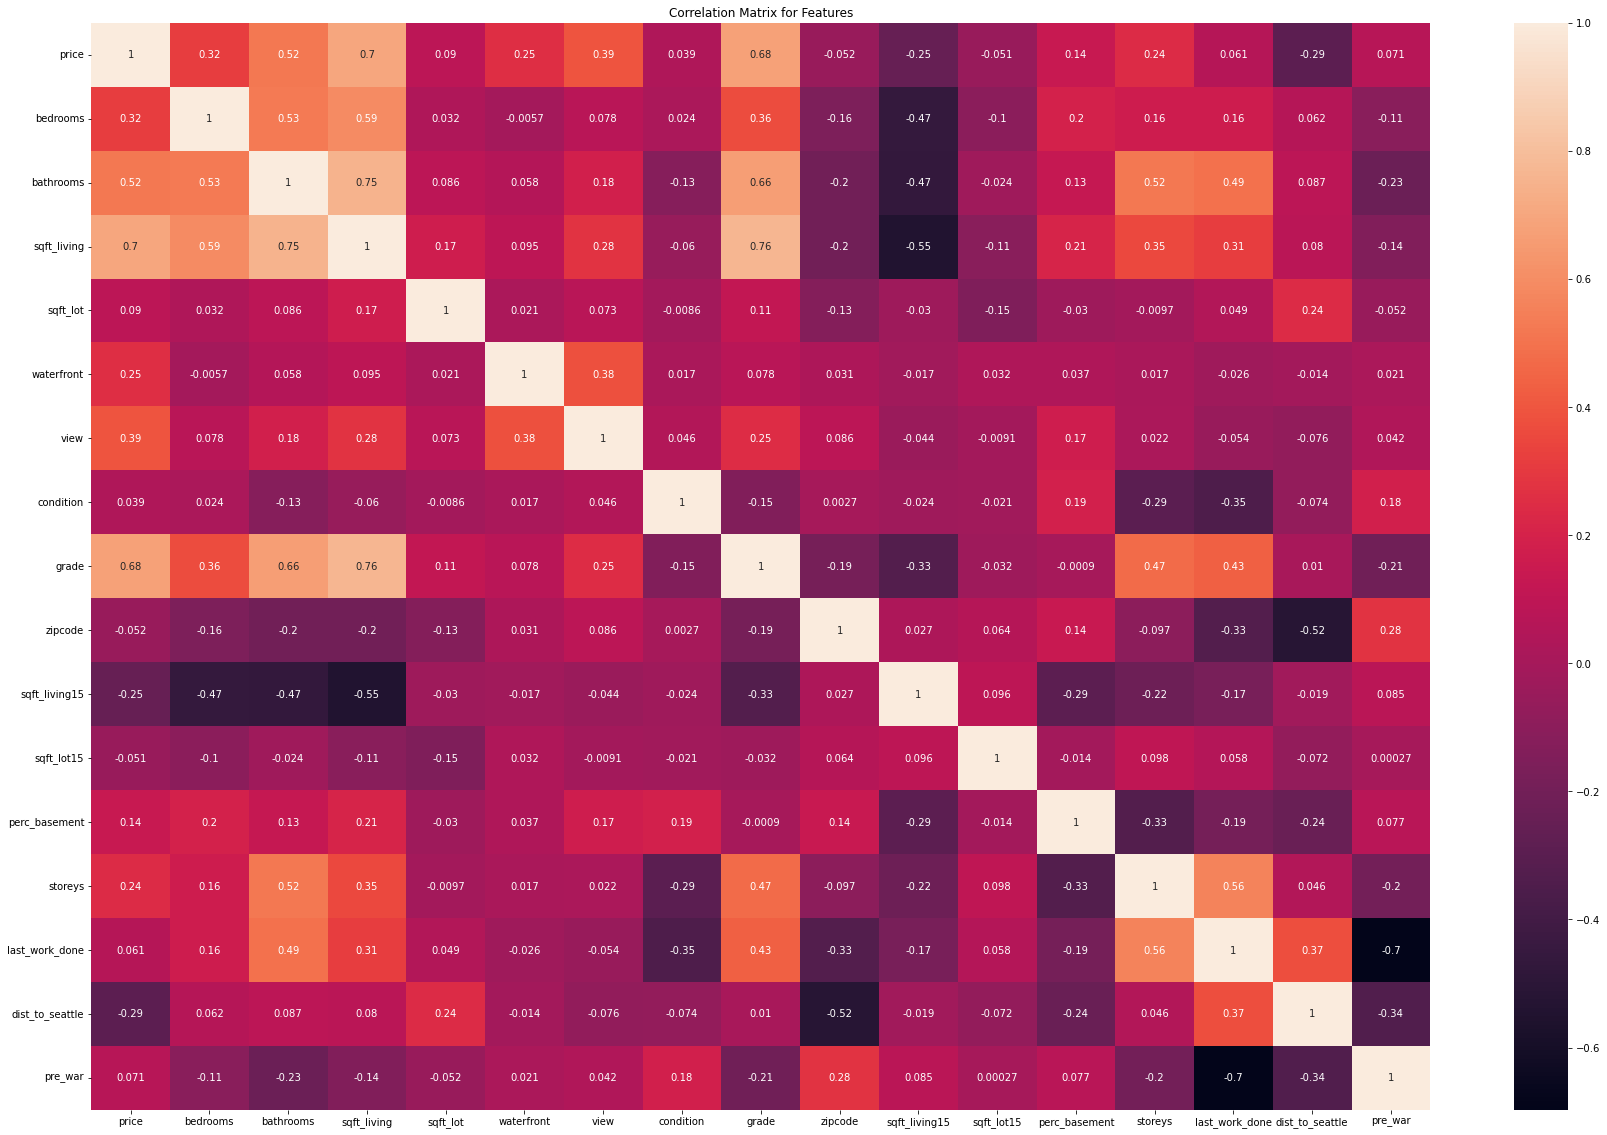

In [34]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Features')
plt.show()

In [35]:
# exclude_list = ['price']
# frame = df.loc[:, ~df.columns.isin(exclude_list)]
# cols = 2
# rows = int(len(frame.columns) // cols) + int(len(frame.columns) % cols > 0)
# f = plt.figure(figsize=(25,10*rows))
# for i, col in enumerate(frame.columns):
#     print(col)
#     f.add_subplot(rows, cols, i+1)
#     sns.regplot(data = frame , x= col, y = df['price'])
# plt.show();

<AxesSubplot:xlabel='grade', ylabel='price'>

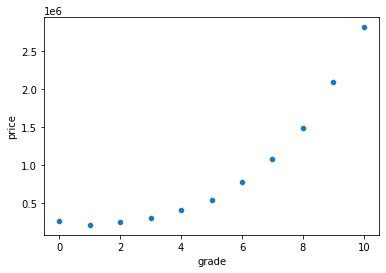

In [36]:
target = 'grade'


sub_frame = df[['price',target]].groupby(target).mean()
sns.scatterplot(data = sub_frame, x = target, y= 'price')

<AxesSubplot:xlabel='grade', ylabel='price'>

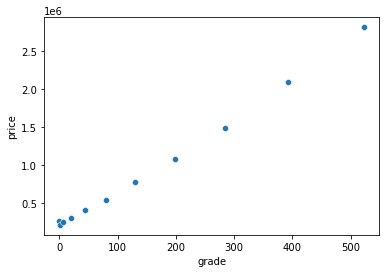

In [37]:
df['grade'] = df.grade**np.e
target = 'grade'


sub_frame = df[['price',target]].groupby(target).mean()
sns.scatterplot(data = sub_frame, x = target, y= 'price')

In [38]:
# include_list = ['bedrooms','bathrooms','waterfront', 'view', 'condition','grade','storeys', 'last_work_done']
# frame = df.loc[:, df.columns.isin(include_list)]
# cols = 2
# rows = int(len(frame.columns) // cols) + int(len(frame.columns) % cols > 0)
# f = plt.figure(figsize=(25,10*rows))
# for i, col in enumerate(frame.columns):
#     sub_frame = df[['price',col]].groupby(col).mean()
#     print(col)
#     f.add_subplot(rows, cols, i+1)
#     sns.scatterplot(data = sub_frame , x= col, y = df['price'])
# plt.show();

In [39]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'perc_basement', 'storeys', 'last_work_done',
       'dist_to_seattle', 'pre_war'],
      dtype='object')

In [40]:
# exclude_list = []
# frame = df.loc[:, ~df.columns.isin(exclude_list)]
# cols = 4
# rows = int(len(frame.columns) / cols) + int(len(frame.columns) % cols > 0)
# f = plt.figure(figsize=(25,6*rows))
# for i, col in enumerate(frame.columns):
#     f.add_subplot(rows, cols, i+1)
#     sns.histplot(frame[col])
# plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='bedrooms'>

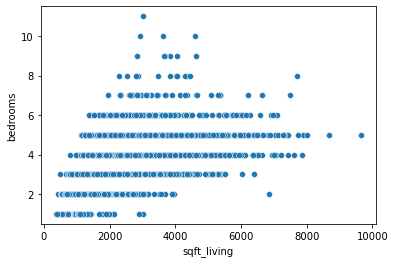

In [41]:
sns.scatterplot(data=df, x='sqft_living',y='bedrooms')

Text(0.5, 1.0, 'String')

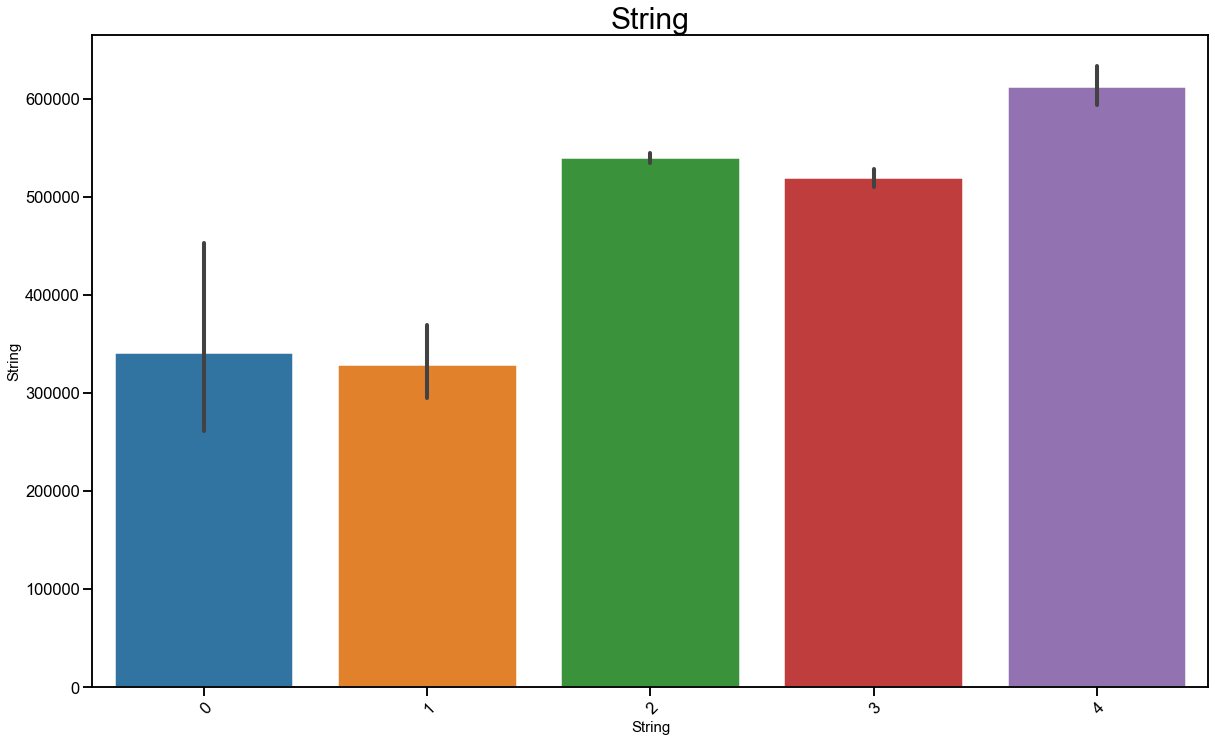

In [42]:
data = df.groupby(['condition']).mean()
x = df['condition']
y = df['price']
title_size = 30
label_size = 15


sns.set_context("talk")
fig, ax=plt.subplots(figsize=(20,12))
sns.set_style("ticks")
p = sns.barplot(ax=ax, data=data, x=x, y=y)
plt.setp(ax.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')

p.set_xlabel('String',fontsize=label_size)
p.set_ylabel('String',fontsize=label_size)
p.set_title('String',fontsize=title_size)


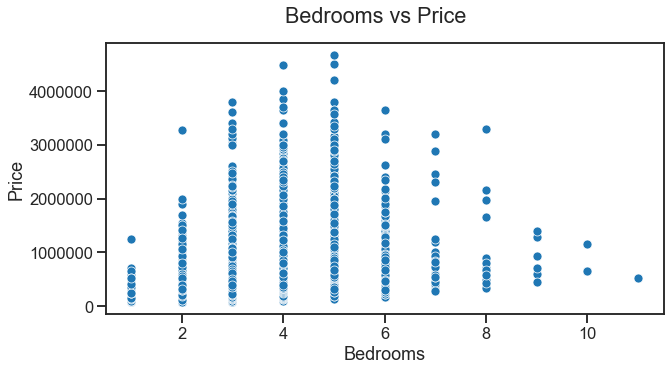

In [43]:
fig, axs = plt.subplots(figsize = (10,5))
fig.suptitle('Bedrooms vs Price')
sns.scatterplot(data = df, x = 'bedrooms', y = 'price').set(xlabel='Bedrooms', ylabel='Price')
plt.ticklabel_format(style='plain', axis='y')

''

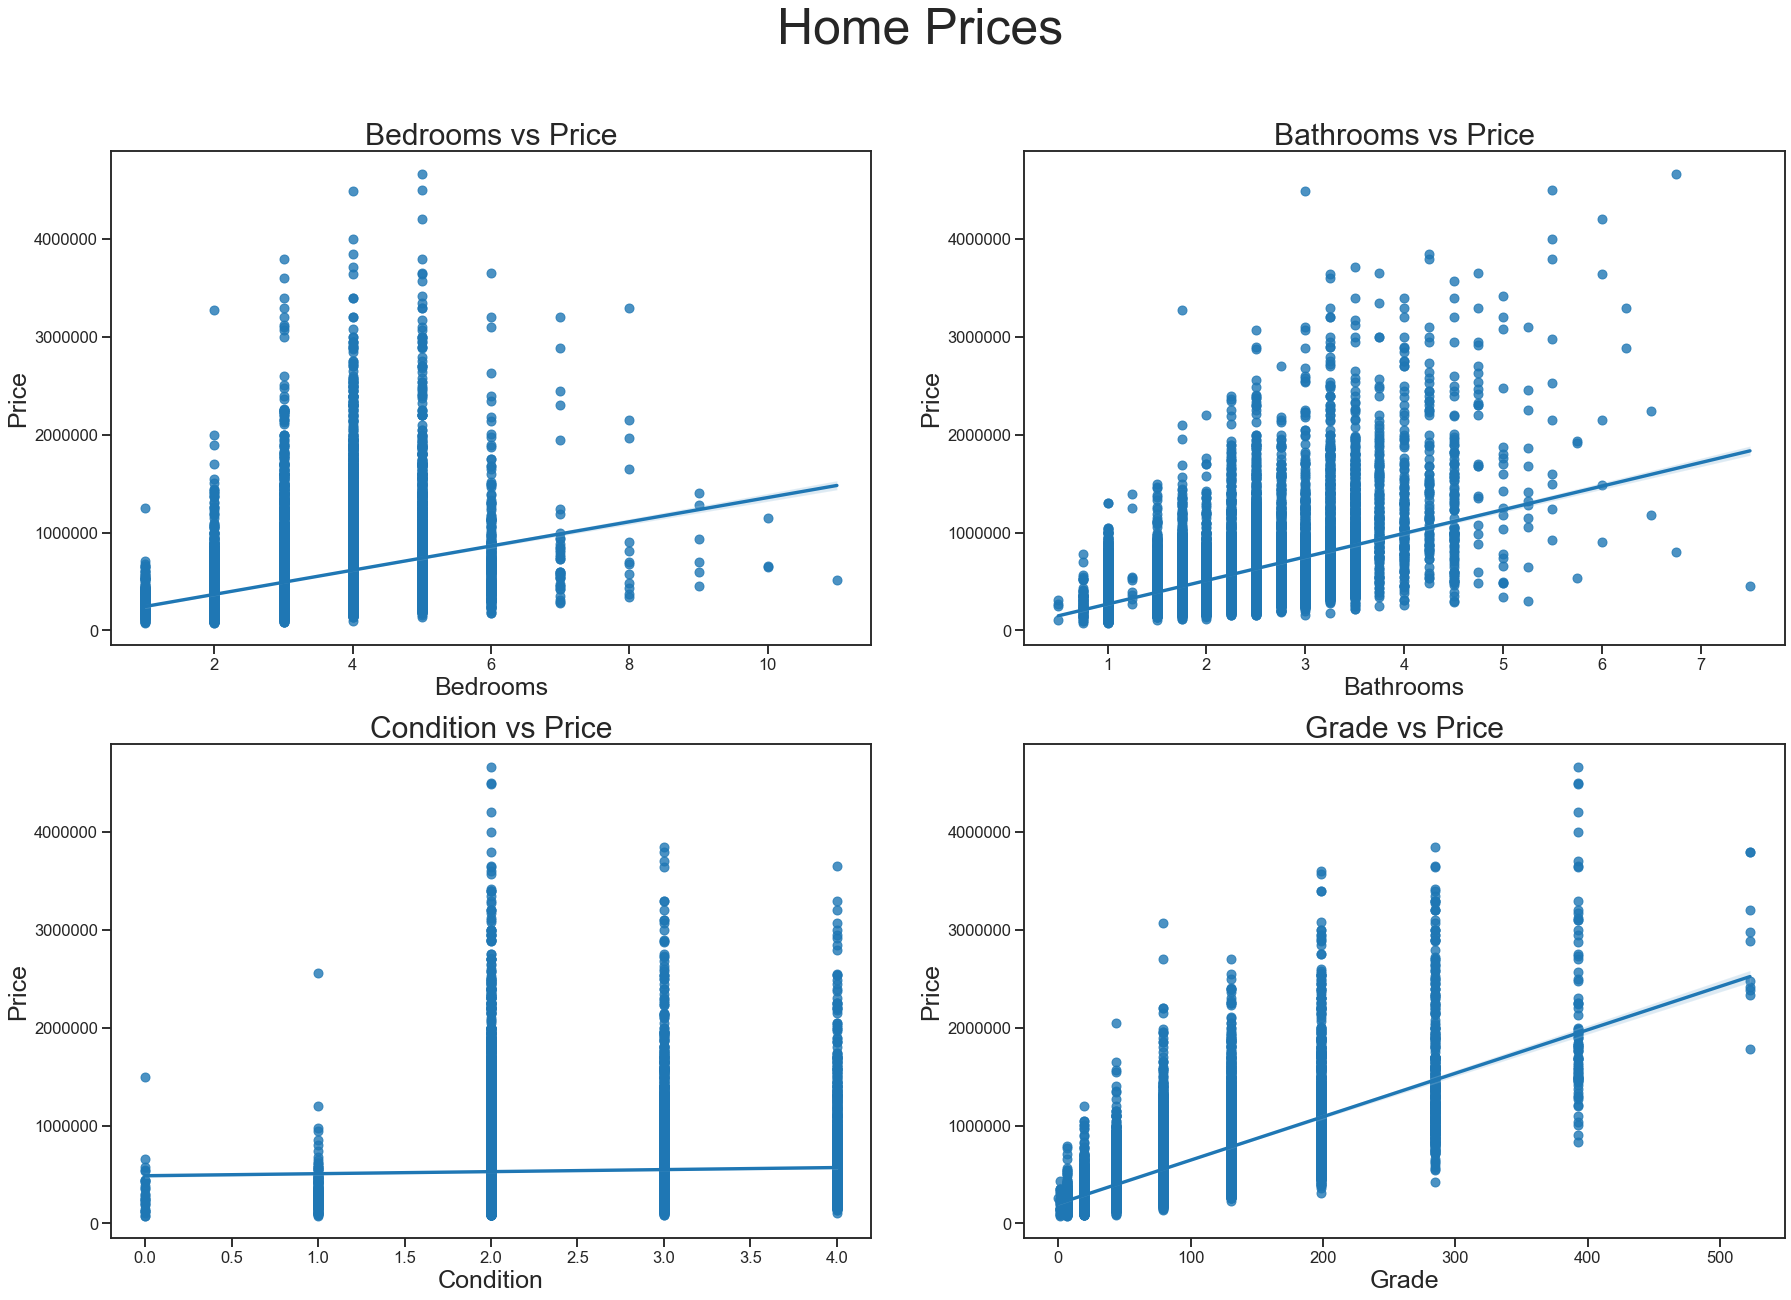

In [44]:
fig, axs = plt.subplots(2,2, figsize = (30,20))
fig.suptitle("Home Prices", fontsize = 50)
sns.regplot(x='bedrooms', y='price', data= df, ax=axs[0,0] )
sns.regplot(x="bathrooms", y="price", data = df, ax=axs[0,1])
sns.regplot(x='condition', y='price', data= df, ax = axs [1,0])
sns.regplot(x='grade', y='price', data= df, ax = axs[1,1])
axs[0,0].set_title('Bedrooms vs Price', fontsize = 30)
axs[0,1].set_title('Bathrooms vs Price', fontsize = 30)
axs[1,0].set_title('Condition vs Price', fontsize = 30)
axs[1,1].set_title('Grade vs Price', fontsize = 30)
axs[0,0].ticklabel_format(axis = 'y', style = 'plain')
axs[0,1].ticklabel_format(axis = 'y', style = 'plain')
axs[1,0].ticklabel_format(axis = 'y', style = 'plain')
axs[1,1].ticklabel_format(axis = 'y', style = 'plain')
axs[0,0].set_xlabel("Bedrooms", fontsize = 25)
axs[0,1].set_xlabel("Bathrooms", fontsize = 25)
axs[1,0].set_xlabel("Condition", fontsize = 25)
axs[1,1].set_xlabel("Grade", fontsize = 25)
axs[0,0].set_xlabel("Bedrooms", fontsize = 25)
axs[0,1].set_xlabel("Bathrooms", fontsize = 25)
axs[1,0].set_xlabel("Condition", fontsize = 25)
axs[1,1].set_xlabel("Grade", fontsize = 25)
axs[0,0].set_ylabel("Price", fontsize = 25)
axs[0,1].set_ylabel("Price", fontsize = 25)
axs[1,0].set_ylabel("Price", fontsize = 25)
axs[1,1].set_ylabel("Price", fontsize = 25)
;

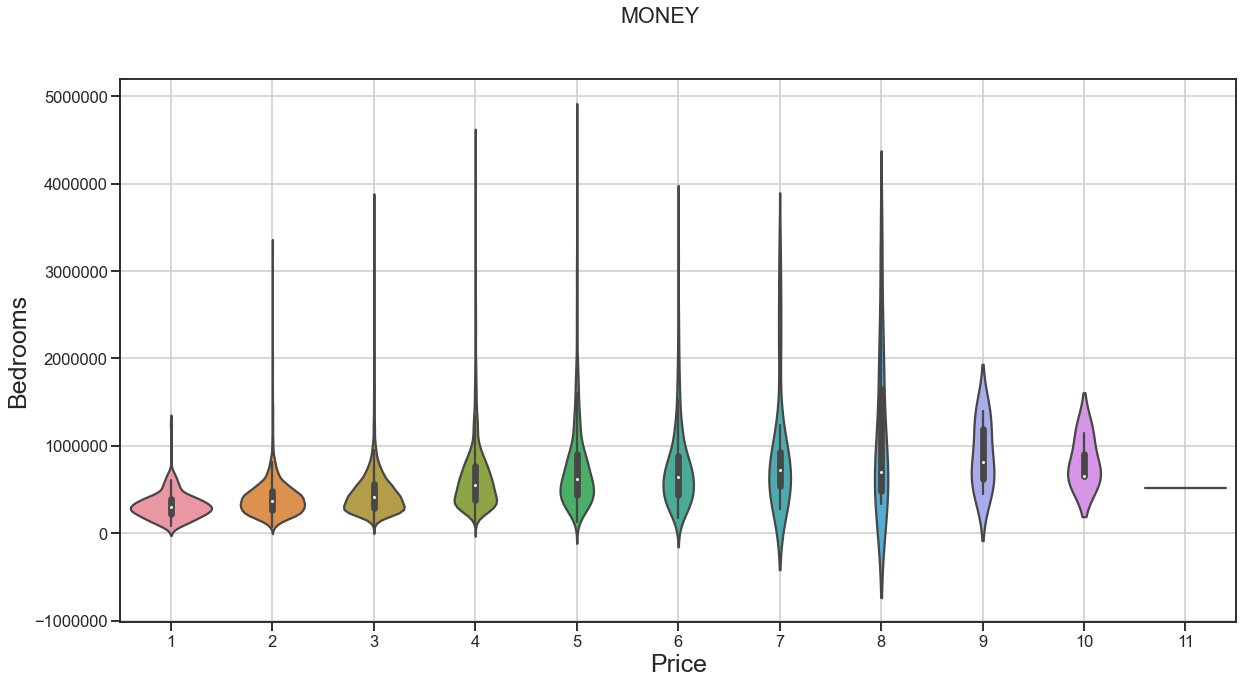

In [45]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle("MONEY")
sns.violinplot(data = df, x = 'bedrooms', y = 'price')
plt.ticklabel_format(style='plain', axis='y')
axs.set_xlabel("Price", fontsize = 25)
axs.set_ylabel("Bedrooms", fontsize = 25)
plt.grid()

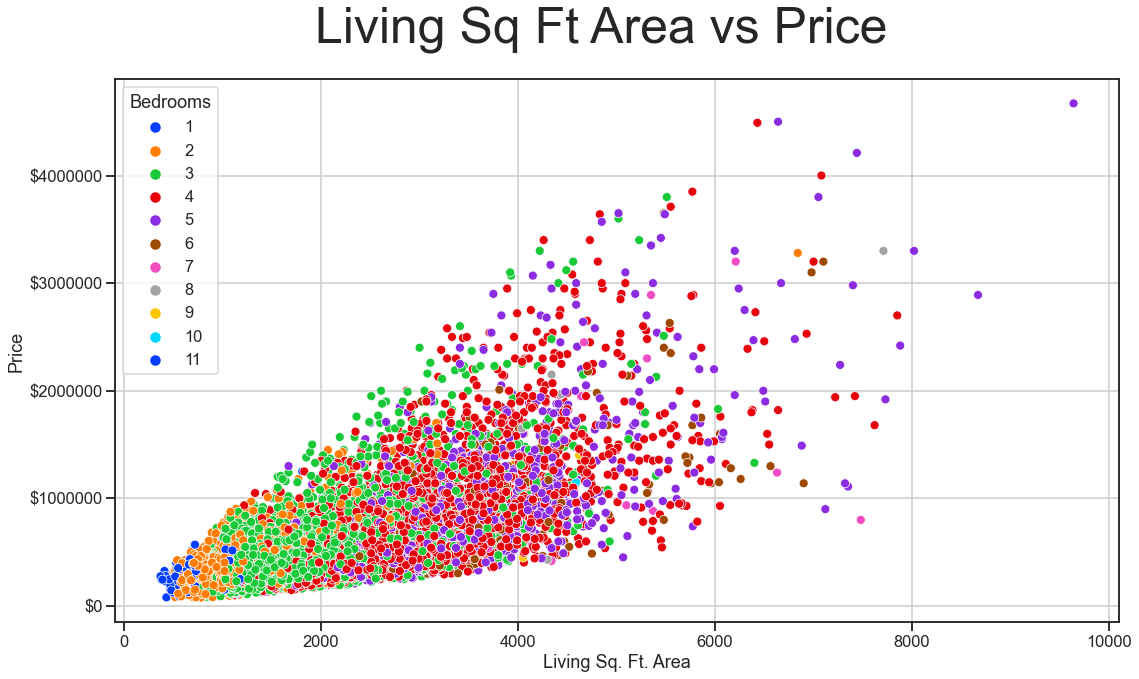

In [46]:
fig, axs = plt.subplots(figsize = (18,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_living', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Living Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

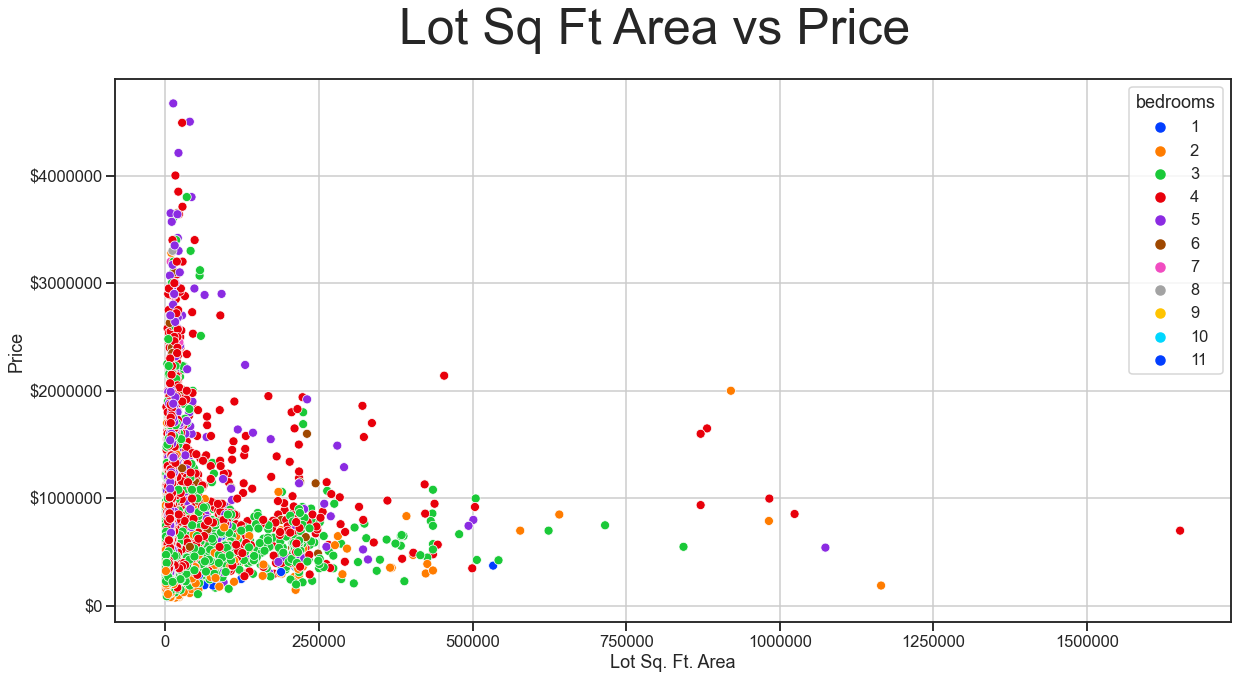

In [47]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle('Lot Sq Ft Area vs Price', fontsize  = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_lot', y = 'price', hue = 'bedrooms', palette = 'bright' ).set(xlabel='Lot Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()

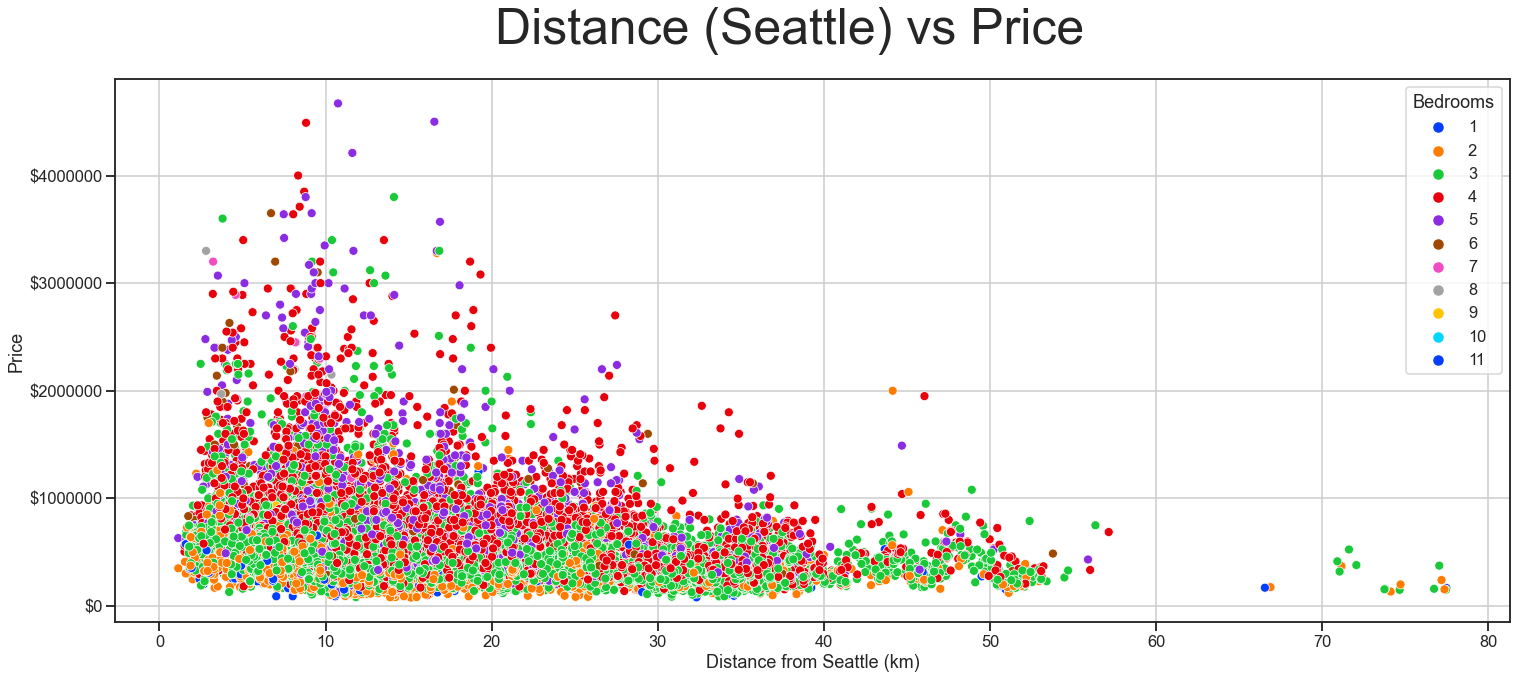

In [48]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Distance (Seattle) vs Price', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'dist_to_seattle', y = 'price', hue = 'bedrooms', palette = 'bright').set(xlabel='Distance from Seattle (km)', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
plt.legend(title = 'Bedrooms')

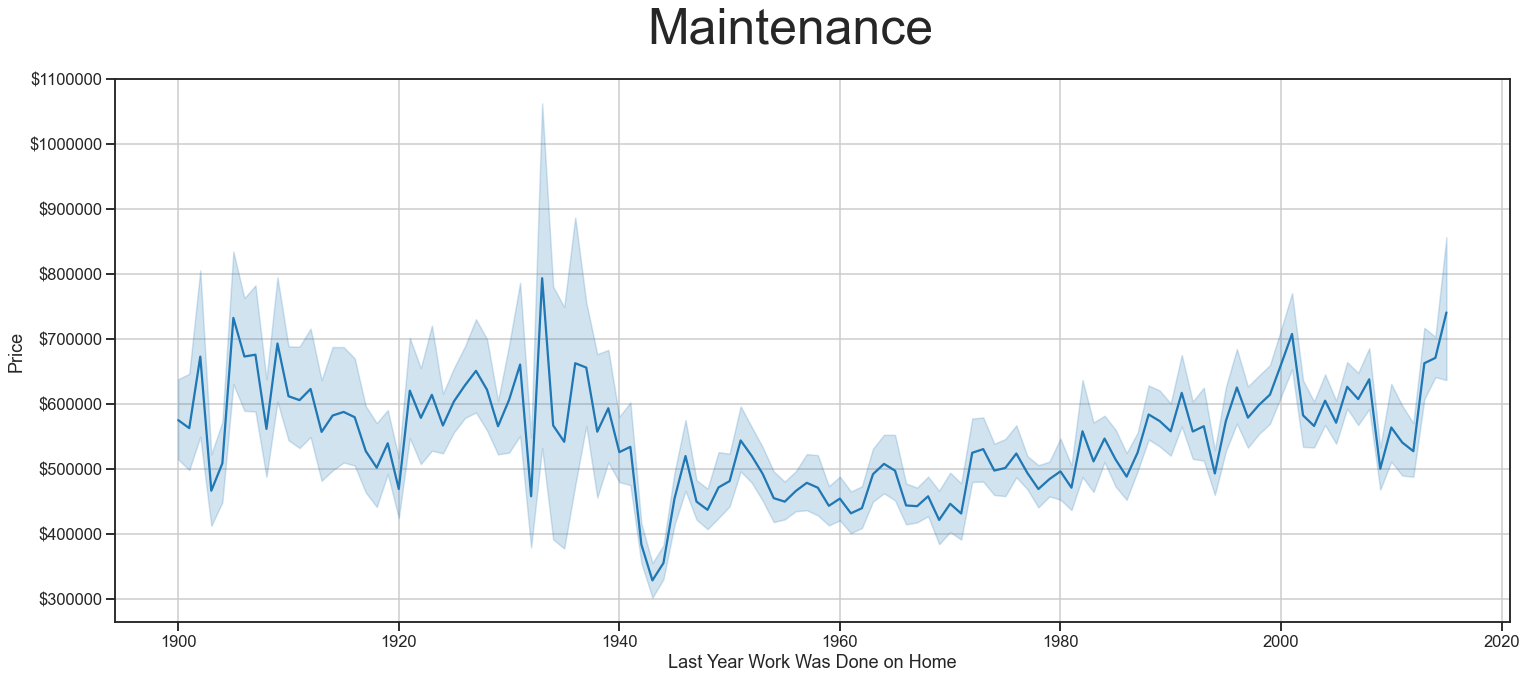

In [49]:
fig, axs = plt.subplots(figsize = (25,10))
fig.suptitle('Maintenance', fontsize = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.lineplot(data = df, x = 'last_work_done', y = 'price').set(xlabel='Last Year Work Was Done on Home', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()


[(0.0, 5000.0), (0.0, 500000.0)]

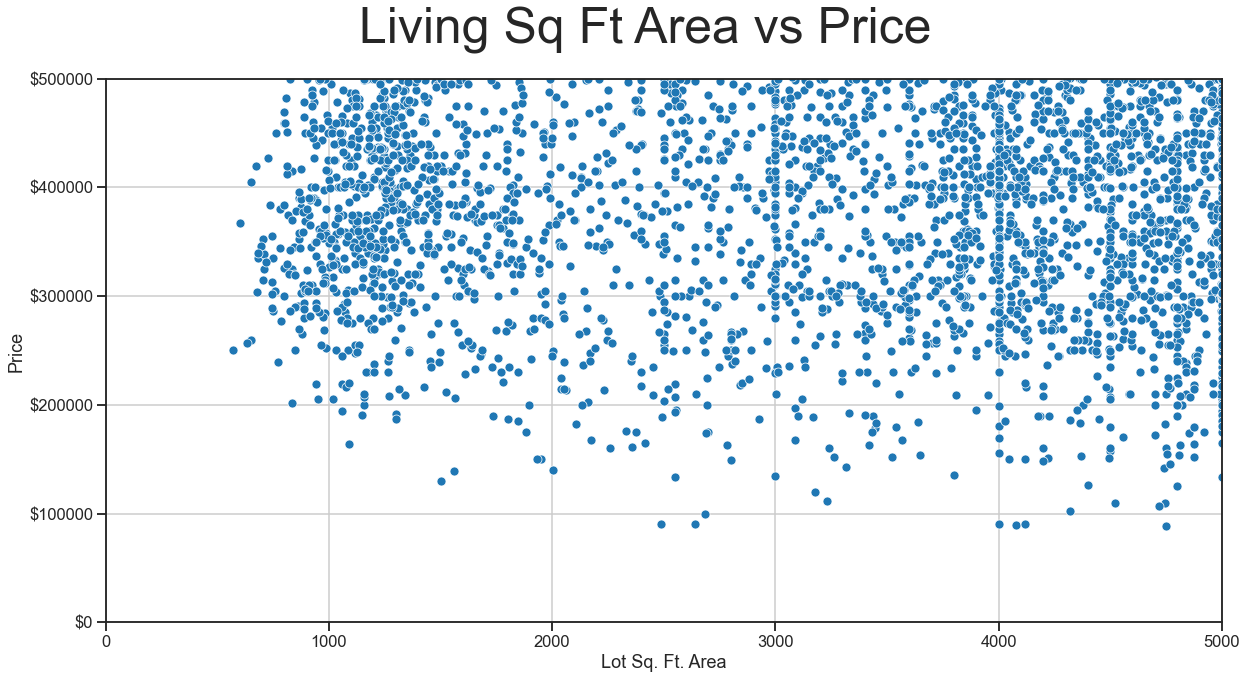

In [50]:
fig, axs = plt.subplots(figsize = (20,10))
fig.suptitle('Living Sq Ft Area vs Price', fontsize  = 50)
axs.yaxis.set_major_formatter('${x:1.0f}')
sns.scatterplot(data = df, x = 'sqft_lot', y = 'price', palette = 'bright' ).set(xlabel='Lot Sq. Ft. Area', ylabel='Price')
plt.ticklabel_format(style='plain', axis='x')
plt.grid()
axs.set(xlim=(0, 5000),ylim=(0,500000))

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21589 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            21589 non-null  float64
 1   bedrooms         21589 non-null  int64  
 2   bathrooms        21589 non-null  float64
 3   sqft_living      21589 non-null  int64  
 4   sqft_lot         21589 non-null  int64  
 5   waterfront       21589 non-null  int64  
 6   view             21589 non-null  int32  
 7   condition        21589 non-null  int64  
 8   grade            21589 non-null  float64
 9   zipcode          21589 non-null  int64  
 10  sqft_living15    21589 non-null  float64
 11  sqft_lot15       21589 non-null  float64
 12  perc_basement    21589 non-null  float64
 13  storeys          21589 non-null  int32  
 14  last_work_done   21589 non-null  int64  
 15  dist_to_seattle  21589 non-null  float64
 16  pre_war          21589 non-null  int64  
dtypes: float64(7

In [52]:
df = pd.get_dummies(df,columns=['zipcode'],drop_first=True)

## Multivariate Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep

In [54]:
X = df.iloc[:,1:]
y = df.price
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lm = LinearRegression().fit(X_train,y_train)
lm.score(X_train, y_train)

0.839355607041983

In [55]:
lm.score(X_test, y_test)

0.8205623608865521

In [56]:
coef_list = list(lm.coef_)
coef_list.append(lm.intercept_)
res_df = pd.DataFrame(coef_list,columns=['coefficient'])

In [57]:
res_df

,coefficient
0,-12164.276202
1,24271.155327
2,164.085376
3,0.220317
4,642734.199851
...,...
80,-67397.576049
81,-51229.328042
82,-46437.139961
83,245851.148080


In [58]:
col_list = list(X.columns)
col_list.append('intercept')
res_df['variable'] = col_list
res_df.set_index('variable',inplace=True)
res_df['variable'] = col_list

In [59]:
res_df['abs_coeff'] = res_df.coefficient.abs()
coeff_df = res_df.sort_values('abs_coeff',ascending=False)

Text(0.5, 1.0, '10 Strongest Influencers of Price')

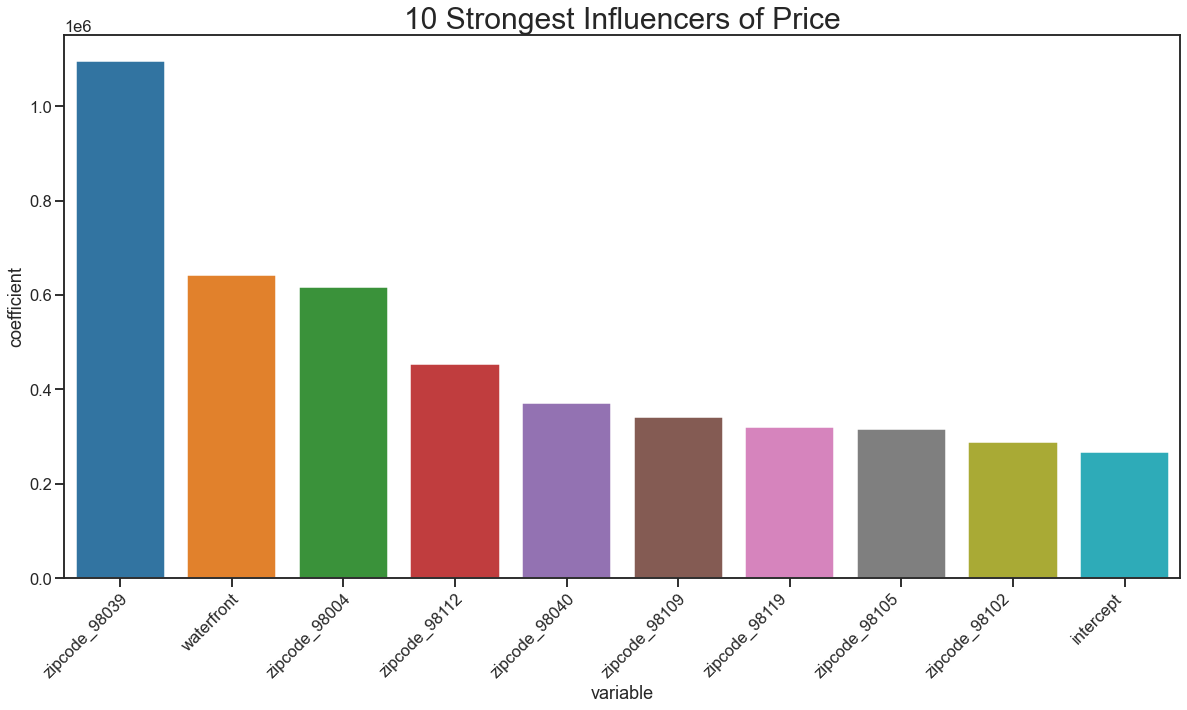

In [60]:

fig, axs = plt.subplots(figsize = (20,10))
plt.setp(axs.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')
axs = sns.barplot(data = coeff_df.head(10),x='variable',y='coefficient')


sns.set_context("talk")
sns.set_style("ticks")
axs.set_title('10 Strongest Influencers of Price',fontsize=title_size)

Text(0.5, 1.0, 'Our Model Predictions')

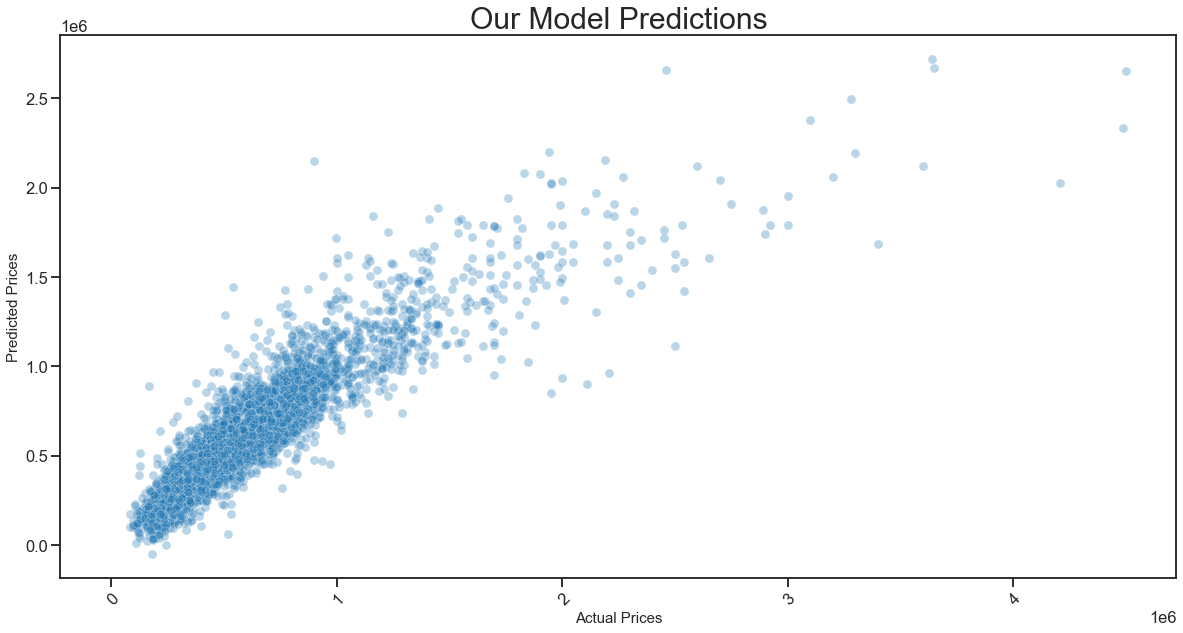

In [61]:
y_ax = lm.predict(X_test)
x_ax = y_test
fig, axs = plt.subplots(figsize = (20,10))
plt.setp(axs.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')


sns.set_context("talk")
sns.set_style("ticks")

X_plot = np.linspace(-2, 10, 100)
Y_plot = X_plot
axs = sns.scatterplot(x=x_ax, y=y_ax,alpha=.3)
plt.plot(X_plot, Y_plot, color='r')
#axs.plot(ax.get_ylim(), ax.get_ylim())
axs.set_xlabel('Actual Prices',fontsize=label_size)
axs.set_ylabel('Predicted Prices',fontsize=label_size)
axs.set_title('Our Model Predictions',fontsize=title_size)

In [62]:
df.columns[0:17]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'sqft_living15',
       'sqft_lot15', 'perc_basement', 'storeys', 'last_work_done',
       'dist_to_seattle', 'pre_war', 'zipcode_98002'],
      dtype='object')

In [63]:
df_interact = df.copy()


In [64]:
start_i = 1
finish_i = 16
for i,x in enumerate(df_interact.columns[start_i:finish_i]):
    for j,y in enumerate(df_interact.columns[i+start_i:finish_i]):
        df_interact[x+' * '+y] = df_interact[x] * df_interact[y]

C:\Users\kapta\AppData\Local\Temp\ipykernel_9132\4127113523.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interact[x+' * '+y] = df_interact[x] * df_interact[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_9132\4127113523.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interact[x+' * '+y] = df_interact[x] * df_interact[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_9132\4127113523.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

In [65]:

print(df_interact.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'view', 'condition', 'grade', 'sqft_living15',
       ...
       'storeys * storeys', 'storeys * last_work_done',
       'storeys * dist_to_seattle', 'storeys * pre_war',
       'last_work_done * last_work_done', 'last_work_done * dist_to_seattle',
       'last_work_done * pre_war', 'dist_to_seattle * dist_to_seattle',
       'dist_to_seattle * pre_war', 'pre_war * pre_war'],
      dtype='object', length=205)


In [66]:
len(df.columns[16:95])

69

In [67]:
df_interact.columns[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15',
       ...
       'storeys * storeys', 'storeys * last_work_done',
       'storeys * dist_to_seattle', 'storeys * pre_war',
       'last_work_done * last_work_done', 'last_work_done * dist_to_seattle',
       'last_work_done * pre_war', 'dist_to_seattle * dist_to_seattle',
       'dist_to_seattle * pre_war', 'pre_war * pre_war'],
      dtype='object', length=204)

In [68]:
start_i = 16
finish_i = 85
df_interact = df_interact.copy()
for i,x in enumerate(df_interact.columns[start_i:85]):
    for j,y in enumerate(df_interact.columns[1:start_i]):
        df_interact[x+' * '+y] = df_interact[x] * df_interact[y]

C:\Users\kapta\AppData\Local\Temp\ipykernel_9132\787617820.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interact[x+' * '+y] = df_interact[x] * df_interact[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_9132\787617820.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_interact[x+' * '+y] = df_interact[x] * df_interact[y]
C:\Users\kapta\AppData\Local\Temp\ipykernel_9132\787617820.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor 

In [69]:
df_int_stand = pd.DataFrame(prep.StandardScaler().fit_transform(df_interact),columns = df_interact.columns)

In [70]:
X2 = df_int_stand.iloc[:,1:]
y2 = df_int_stand.price
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)
# lm2 = LinearRegression().fit(X2_train,y2_train)
# score_baseline = lm2.score(X2_test, y2_test)

In [71]:
results = []

In [72]:
# inc = 1
# for x in X2_train.columns[::-1]:
#     print('run '+ str(inc) + ' testing column ' + x + '  columns : ' +str(len(X2_train.columns)))
#     print('     initial score:' + str(score_baseline))
#     X3_train = X2_train.drop(columns = [x],inplace=False)
#     X3_test = X2_test.drop(columns = [x],inplace=False)
#     lm_test = LinearRegression().fit(X3_train,y2_train)
#     score = lm_test.score(X3_test, y2_test)
#     print('     train r2: '+str(lm_test.score(X3_train,y2_train)))
#     print('     new score:' + str(score))
#     if score >= score_baseline*50:
#         X2_train.drop(columns = [x],inplace=True)
#         X2_test.drop(columns = [x],inplace=True)
#         results.append([[X_train.columns],[score]])
#         score_baseline = score
#     inc += 1



In [73]:
inc = 1
score_baseline = 0
X4_train = pd.DataFrame(X2_train['bedrooms'],columns=['bedrooms'])
X4_test = pd.DataFrame(X2_test['bedrooms'],columns=['bedrooms'])
X4_train

,bedrooms
2254,-0.410780
4063,0.696515
12818,-0.410780
20650,0.696515
21204,-0.410780
...,...
11964,0.696515
21575,0.696515
5390,0.696515
860,-2.625368


In [75]:
inc = 1
runs = 3
for run in range(0,runs):
    for x in X2_train.columns:
        print('run '+ str(inc) + ' testing column ' + x + '  columns : ' +str(len(X4_train.columns)))
        print('     initial score:' + str(score_baseline))
        X4_train[x] = X2_train[x]
        X4_test[x] = X2_test[x]
        lm_test = LinearRegression().fit(X4_train,y2_train)
        score = lm_test.score(X4_test, y2_test)
        print('     train score:' + str(lm_test.score(X4_train, y2_train)))
        print('     new score:' + str(score))
        if score < score_baseline:
            X4_train.drop(columns = [x],inplace=True)
            X4_test.drop(columns = [x],inplace=True)
        else:
            results.append([[X_train.columns],[score]])
            score_baseline = score
        inc += 1
    for x in X4_train.columns[::-1]:
        print('run '+ str(inc) + ' testing column ' + x + '  columns : ' +str(len(X4_train.columns)))
        print('     initial score:' + str(score_baseline))

        X3_train = X4_train.drop(columns = [x],inplace=False)
        X3_test = X4_test.drop(columns = [x],inplace=False)
        lm_test = LinearRegression().fit(X3_train,y2_train)
        score = lm_test.score(X3_test, y2_test)
        print('     train score:' + str(lm_test.score(X3_train, y2_train)))
        print('     new score:' + str(score))
        if score >= score_baseline:
            X4_train.drop(columns = [x],inplace=True)
            X4_test.drop(columns = [x],inplace=True)
            results.append([[X4_train.columns],[score]])
            score_baseline = score
        inc += 1


SyntaxError: invalid syntax (536499893.py, line 3)

In [ ]:
lm4 = LinearRegression().fit(X4_train,y2_train)
lm4.score(X4_test, y2_test)

0.9015251612740846

Text(0.5, 1.0, 'Our Model Predictions')

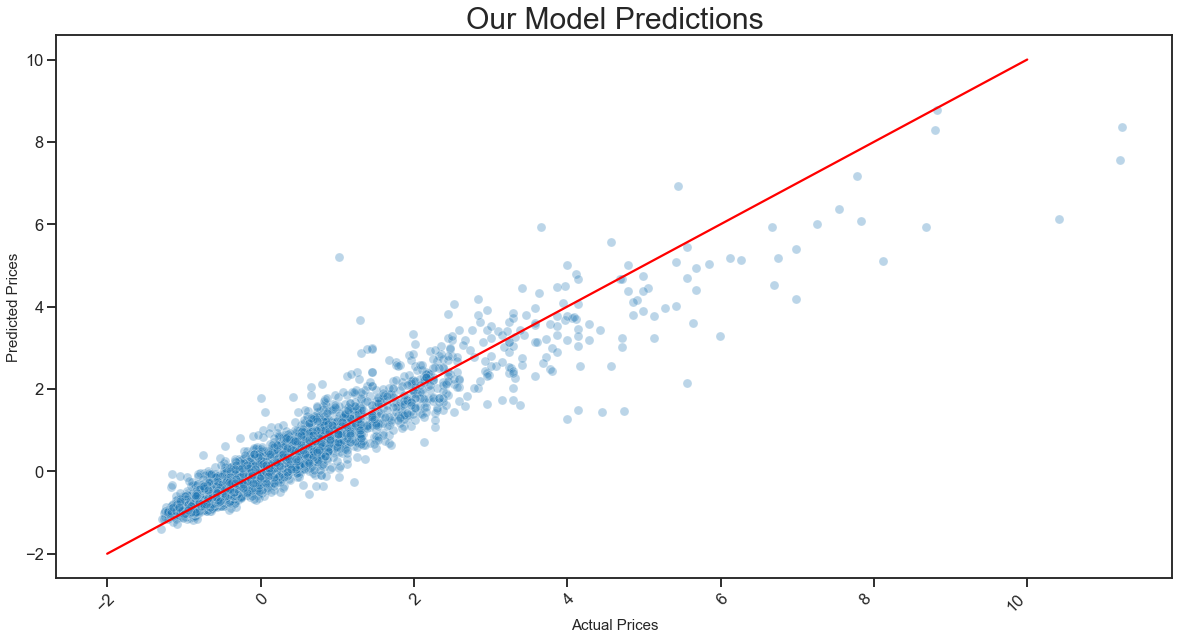

In [ ]:
y_ax = lm4.predict(X4_test)
x_ax = y_test
fig, axs = plt.subplots(figsize = (20,10))
plt.setp(axs.get_xticklabels(), ha="right", rotation=45,rotation_mode='anchor')


sns.set_context("talk")
sns.set_style("ticks")

X_plot = np.linspace(-2, 10, 100)
Y_plot = X_plot
axs = sns.scatterplot(x=x_ax, y=y_ax,alpha=.3)
plt.plot(X_plot, Y_plot, color='r')
#axs.plot(ax.get_ylim(), ax.get_ylim())
axs.set_xlabel('Actual Prices',fontsize=label_size)
axs.set_ylabel('Predicted Prices',fontsize=label_size)
axs.set_title('Our Model Predictions',fontsize=title_size)